In [13]:
import numpy as np
import cmath
from sympy import*
import matplotlib.pyplot as plt
import matplotlib
def print_function(f,var):
    n,d=fraction(f)
    n=Poly(n,var)
    n_coeff=n.all_coeffs()
    n_coeff=[round(elem,3) for elem in n_coeff]
    d=Poly(d,var)
    d_coeff=d.all_coeffs()
    d_coeff=[round(elem,3) for elem in d_coeff]
    degn=degree(n)
    degd=degree(d)
    n=0
    d=0
    for i in enumerate(n_coeff):
        n=n+var**(degn-i[0])*i[1]
    for i in enumerate(d_coeff):
        d=d+var**(degd-i[0])*i[1]
    p=n/d
    print(p)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


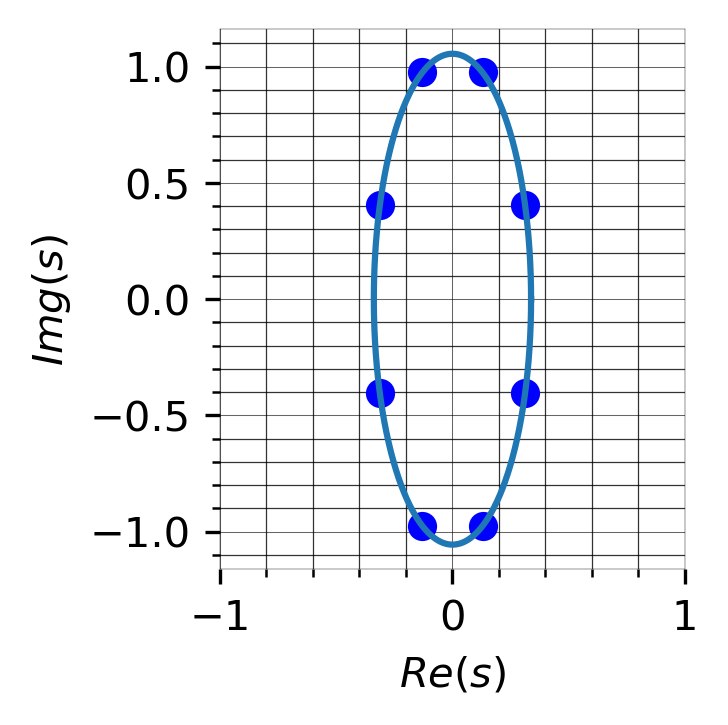

In [14]:
order=4
epsilon=0.57
omegap=1
theta=np.linspace(0,2*np.pi,1000)
x=np.zeros(2*order,dtype=np.complex)
for n in range(2*order):
    x[n]=(complex(np.sin((2*n+1)*np.pi/2/order)*np.sinh(np.arcsinh(1/epsilon)/order),np.cos((2*n+1)*np.pi/2/order)*np.cosh(np.arcsinh(1/epsilon)/order)))
x=x*omegap
%matplotlib inline
plt.figure(figsize=(2,3),dpi=300)
plt.plot(np.real(x),np.imag(x),'bo')
plt.axes().set_aspect('equal')
plt.xlim(-1, 1)
plt.xlabel(r'$Re(s)$')
plt.ylabel(r'$Img(s)$')
plt.plot(np.sinh(np.arcsinh(1/epsilon)/order)*np.cos(theta),np.cosh(np.arcsinh(1/epsilon)/order)*np.sin(theta))
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
plt.savefig('roots_chebyschev.png',bbox_inches='tight')
plt.show()

0.868777270192661/(3.96162435207853*s**4 + 3.50062192502055*s**3 + 5.50825684078296*s**2 + 2.66324929453112*s + 1.0)
0.869/(3.962*s**4 + 3.501*s**3 + 5.508*s**2 + 2.663*s + 1.0)


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


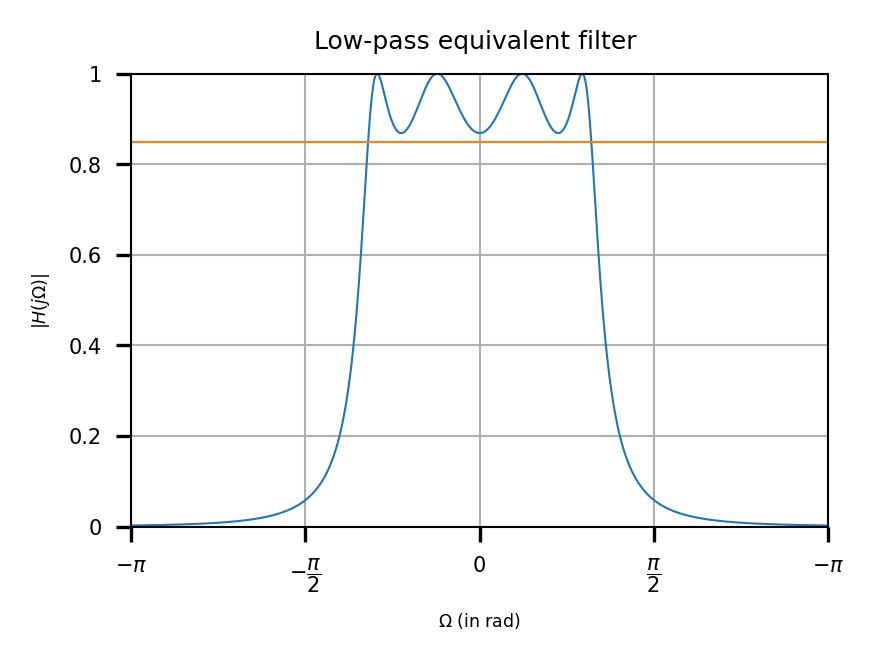

In [15]:
H,s,w,z=symbols('H,s,w,z')
D=Function('D')(s)
D=1
N=Function('N')(s)
N=1/np.sqrt((1+epsilon**2))
for i in range(2*order):
    if(re(x[i])<0):
        D=D*(1-s/x[i])
N=N.real
D=Poly(D,s)
D=D.xreplace({I:0})
D=1/D
D=1/D
H=N/D
print(H)
print_function(H,s)
modH=Function('|H|')(w)
modH=abs(H.subs(s,I*w))
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5

freq_axis=np.linspace(-np.pi,np.pi,1000)
modH_lambdified=lambdify(w,modH)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(freq_axis,modH_lambdified(freq_axis),linewidth=0.5)
plt.xlim(-np.pi, np.pi)
plt.xlabel(r'$\Omega$ (in rad)',fontsize='small')
plt.ylabel(r'$|H(j\Omega)|$',fontsize='small')
plt.xticks([-np.pi,-np.pi/2, 0, np.pi/2,np.pi], [r'$-\pi$',r'$-\dfrac{\pi}{2}$', 0, r'$\dfrac{\pi}{2}$',r'$-\pi$'])
plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.plot(freq_axis,np.linspace(0.85,0.85,1000),linewidth=0.5)
plt.axes().grid(linewidth=0.5)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Low-pass equivalent filter ')
plt.savefig('low_pass.png',bbox_inches='tight')
plt.show()

0.869*s**4/(189.994*s**8 + 63.796*s**7 + 778.344*s**6 + 193.417*s**5 + 1156.712*s**4 + 188.384*s**3 + 738.363*s**2 + 58.944*s + 170.976)
0.868193459573447
0.869174905727226


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


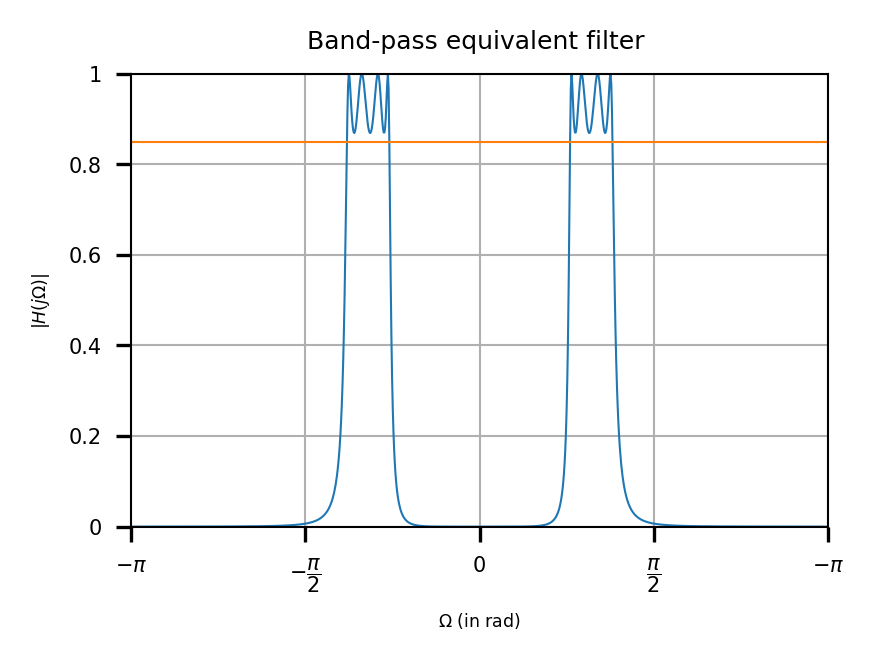

In [16]:
#now transforming back to band-pass
bpH=Function('bpH')(s)
tx=Function('tx')(s)
tx=s/0.38+2.5631/s
bpHD=expand(D.subs(s,tx))
bpHD=together(bpHD,s)
n,d=fraction(bpHD)
bpHD=n/d
bpH=N*d/n
print_function(bpH,s)
modbpH=Function('|bpH|')(w)
modbpH=abs(bpH.subs(s,I*w))
print(modbpH.evalf(subs={w:0.815}))
print(modbpH.evalf(subs={w:1.195}))
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5

freq_axis=np.linspace(-np.pi,np.pi,1000)
modbpH_lambdified=lambdify(w,modbpH)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(freq_axis,modbpH_lambdified(freq_axis),linewidth=0.5)
plt.xlim(-np.pi, np.pi)
plt.xlabel(r'$\Omega$ (in rad)',fontsize='small')
plt.ylabel(r'$|H(j\Omega)|$',fontsize='small')
plt.xticks([-np.pi,-np.pi/2, 0, np.pi/2,np.pi], [r'$-\pi$',r'$-\dfrac{\pi}{2}$', 0, r'$\dfrac{\pi}{2}$',r'$-\pi$'])
plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.plot(freq_axis,np.linspace(0.85,0.85,1000),linewidth=0.5)
plt.axes().grid(linewidth=0.5)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Band-pass equivalent filter ')
plt.savefig('band_pass_analog.png',bbox_inches='tight')
plt.show()

(-0.e-3*z**6 + 0.001*z**4 - 0.e-3*z**2)/(1.0*z**8 - 0.099*z**7 + 3.533*z**6 - 0.266*z**5 + 4.815*z**4 - 0.245*z**3 + 2.993*z**2 - 0.077*z + 0.715)


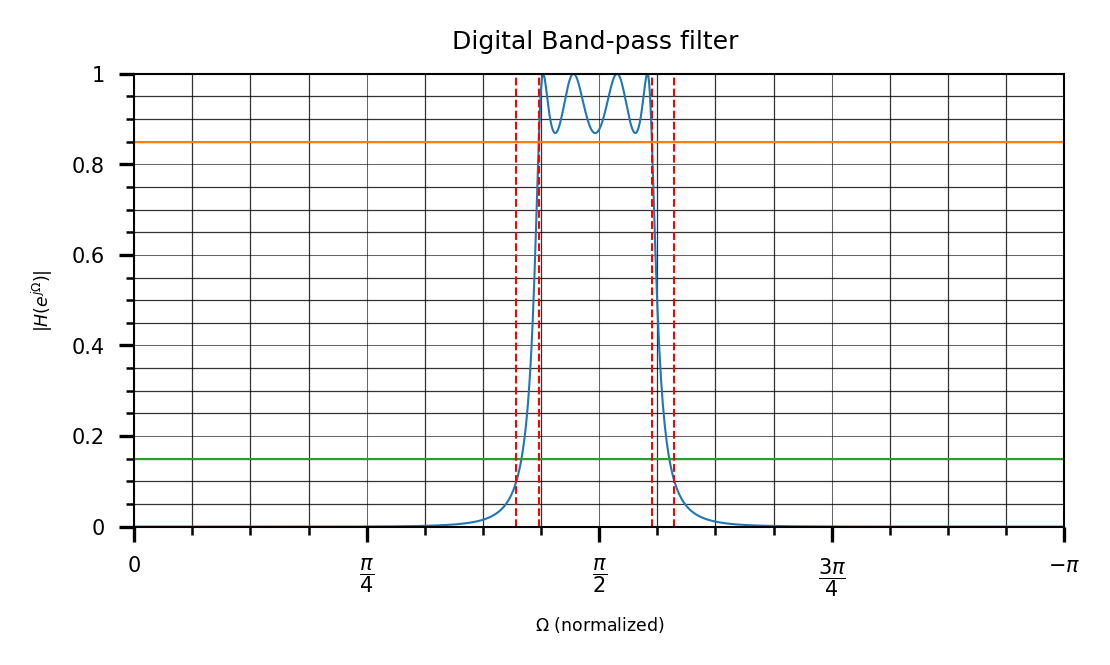

In [17]:
n,d=fraction(bpH)          #d is the denominator of BP function, n is the numerator of BP function
bilinear=Function('bilinear')(z)
bilinear=(z-1)/(z+1)
dz=d.subs(s,bilinear)
dz=together(dz)
dzn,dzd=fraction(dz)
dzn=collect(expand(dzn),z)
dzd=collect(expand(dzd),z)
nz=n.subs(s,bilinear)
nz=together(nz)
nzn,nzd=fraction(nz)
nzn=collect(expand(nzn*nzd),z)
a=Poly(dzn).all_coeffs()
nzn=nzn/a[0]
dzn=dzn/a[0]
filter=nzn/dzn
print_function(filter,z)
filter_discrete=filter.subs(z,exp(I*z))
absf=abs(filter_discrete)
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,absf)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,modH_lambdified(freq_axis),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$|H(e^{j\Omega})|$',fontsize='small')
plt.xticks([0, np.pi/4,np.pi/2,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{2}$',r'$\dfrac{3\pi}{4}$',r'$-\pi$'])
plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.plot(freq_axis,np.linspace(0.85,0.85,1000),linewidth=0.5)
plt.plot(freq_axis,np.linspace(0.15,0.15,1000),linewidth=0.5)
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Digital Band-pass filter ')
plt.axvline(x=0.4109*np.pi,color='r',ls='--', lw=0.5)
plt.axvline(x=0.4352*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.5564*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.5806*np.pi,color='r',ls='--', lw=0.5)
plt.savefig('band-pass.png',bbox_inches='tight')
plt.show()

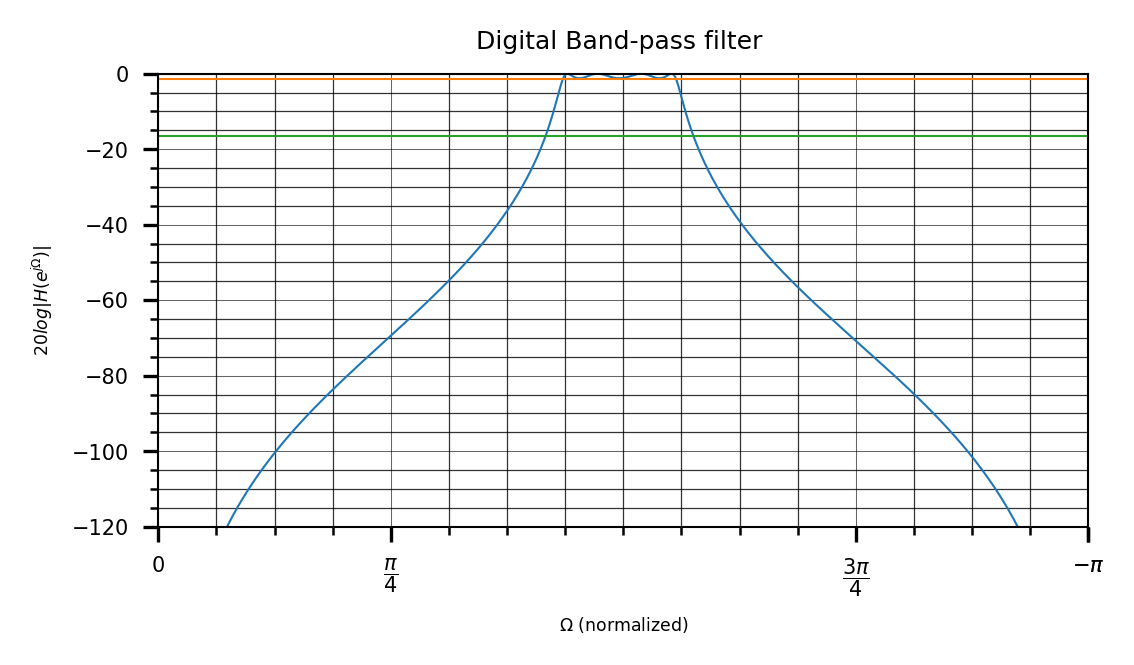

In [18]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,absf)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,20*np.log10(modH_lambdified(freq_axis)),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$20log|H(e^{j\Omega})|$',fontsize='small')
plt.xticks([0, np.pi/4,np.pi,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{2}$',r'$\dfrac{3\pi}{4}$',r'$-\pi$'])
plt.ylim(-120,0)
plt.plot(freq_axis,20*np.log10(np.linspace(0.85,0.85,1000)),linewidth=0.5)
plt.plot(freq_axis,20*np.log10(np.linspace(0.15,0.15,1000)),linewidth=0.5)
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Digital Band-pass filter ')
plt.savefig('Band-pass DB.png',bbox_inches='tight')
plt.show()

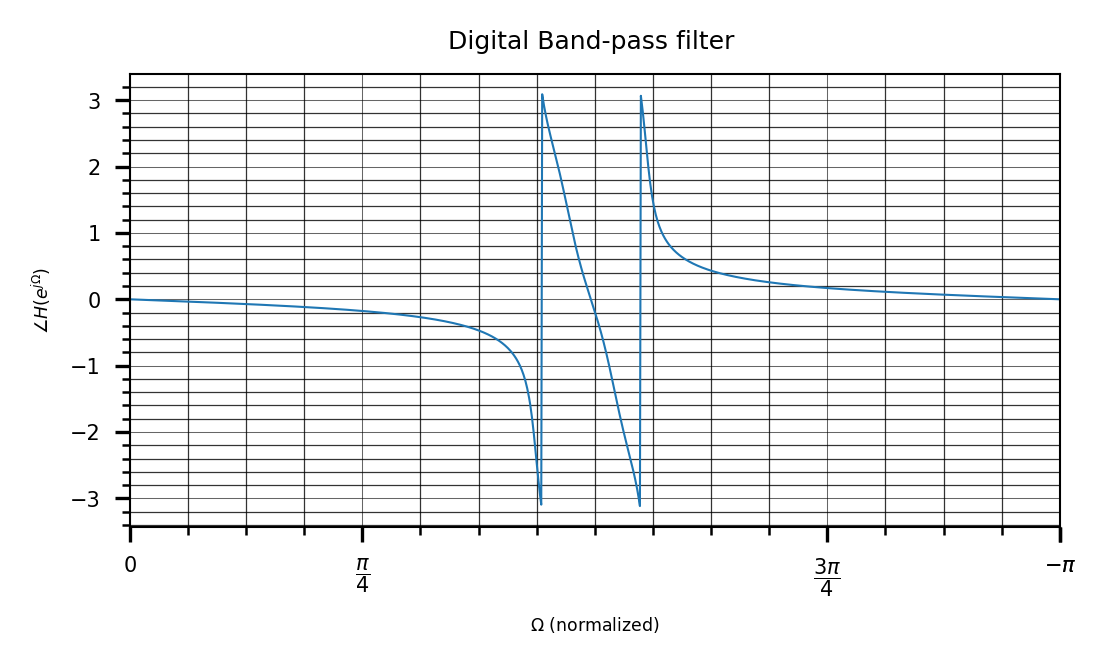

In [19]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,filter_discrete)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,np.angle(modH_lambdified(freq_axis)),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$\angle H(e^{j\Omega})$',fontsize='small')
plt.xticks([0, np.pi/4,np.pi,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{2}$',r'$\dfrac{3\pi}{4}$',r'$-\pi$'])
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Digital Band-pass filter ')
plt.savefig('Band-pass angle.png',bbox_inches='tight')
plt.show()

In [20]:
latex(H)

'\\frac{0.868777270192661}{3.96162435207853 s^{4} + 3.50062192502055 s^{3} + 5.50825684078296 s^{2} + 2.66324929453112 s + 1.0}'